In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#filename="/content/gdrive/My Drive/WSN-DS.csv"
#filename="/content/gdrive/MyDrive/diabetes/pima_indians_diabetes_dataset.csv"
#filename="/content/gdrive/MyDrive/diabetes/new_pima_indians_diabetes_dataset.csv"
filename = "/content/gdrive/MyDrive/diabetes/pima_indians_diabetes_dataset_new3.csv"

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# importing the dataset
dataset = pd.read_csv(filename)

In [4]:
dataset.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.shape

(1536, 10)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1536 non-null   int64  
 1   Pregnancies               1536 non-null   int64  
 2   Glucose                   1536 non-null   int64  
 3   BloodPressure             1536 non-null   int64  
 4   SkinThickness             1536 non-null   int64  
 5   Insulin                   1536 non-null   int64  
 6   BMI                       1536 non-null   float64
 7   DiabetesPedigreeFunction  1536 non-null   float64
 8   Age                       1536 non-null   int64  
 9   Outcome                   1536 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 120.1 KB


In [7]:
dataset.isnull().sum()

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df = pd.DataFrame(dataset)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1536 non-null   int64  
 1   Pregnancies               1536 non-null   int64  
 2   Glucose                   1536 non-null   int64  
 3   BloodPressure             1536 non-null   int64  
 4   SkinThickness             1536 non-null   int64  
 5   Insulin                   1536 non-null   int64  
 6   BMI                       1536 non-null   float64
 7   DiabetesPedigreeFunction  1536 non-null   float64
 8   Age                       1536 non-null   int64  
 9   Outcome                   1536 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 120.1 KB


In [10]:
df.shape

(1536, 10)

In [11]:
X = df.iloc[:,1:-1].values
Y=df.iloc[:,-1].values

In [12]:
(pd.Series(Y)).value_counts()

0    1000
1     536
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


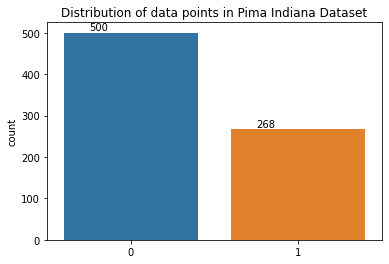

In [17]:
# original dataset
#fig = plt.figure(figsize = (15,12))
plt.title('Distribution of data points in Pima Indiana Dataset')
g = sns.countplot(Y)
#g.set_xticklabels(g.get_xticklabels(),rotation=90)
for p in g.patches:
    g.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+5))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


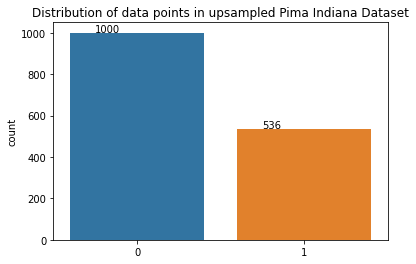

In [29]:
# augmented dataset
#fig = plt.figure(figsize = (15,12))
plt.title('Distribution of data points in upsampled Pima Indiana Dataset')
g = sns.countplot(Y)
#g.set_xticklabels(g.get_xticklabels(),rotation=90)
for p in g.patches:
    g.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+5))

In [13]:
import random as rn
# manual parameters
RANDOM_SEED = 42

# setting random seeds for libraries to ensure reproducibility
np.random.seed(RANDOM_SEED)
rn.seed(RANDOM_SEED)

In [ ]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

def tsne_scatter(features, labels, dimensions=2, save_as='graph.png'):
    if dimensions not in (2, 3):
        raise ValueError('tsne_scatter can only plot in 2d or 3d (What are you? An alien that can visualise >3d?). Make sure the "dimensions" argument is in (2, 3)')

    # t-SNE dimensionality reduction
    features_embedded = TSNE(n_components=dimensions, random_state=RANDOM_SEED).fit_transform(features)
    
    # initialising the plot
    fig, ax = plt.subplots(figsize=(5,5))
    
    # counting dimensions
    # if dimensions == 3: ax = fig.add_subplot(111, projection='3d')

    # plotting data
    ax.scatter(
        *zip(*features_embedded[np.where(labels==1)]),
        marker='o',
        color='r',
        s=2,
        alpha=0.7,
        label='Normal'
    )
    ax.scatter(
        *zip(*features_embedded[np.where(labels==0)]),
        marker='o',
        color='g',
        s=2,
        alpha=0.3,
        label='Diabetic'
    )

    # storing it to be displayed later
    plt.legend(loc='best')
    plt.savefig(save_as);
    plt.show;

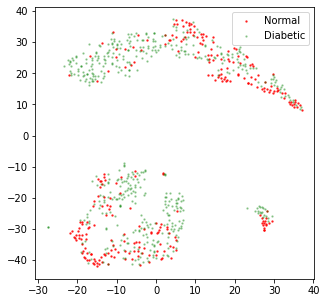

In [ ]:
# original dataset
tsne_scatter(X, Y, dimensions=2, save_as='tsne_initial_2d.png')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


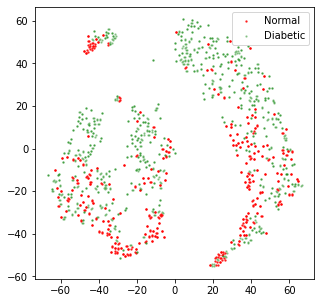

In [ ]:
# augmented dataset
tsne_scatter(X, Y, dimensions=2, save_as='tsne_initial_2d.png')

In [14]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st.fit(X)
X = st.transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=6)

In [16]:
(pd.Series(y_test)).value_counts()

0    191
1    117
dtype: int64

In [17]:
(pd.Series(y_train)).value_counts()

0    809
1    419
dtype: int64

In [ ]:
import time
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB, GaussianNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [ ]:
# Train SVM Model
start=time.time()
SVM_Classifier = SVC(probability=True)
SVM_Classifier.fit(X_train, y_train); 
end=time.time()
timing= end-start
print("The timing information is",timing)

The timing information is 0.2748246192932129


In [ ]:
# Train MLPClassifier Model
start=time.time()
MLP_Classifier = MLPClassifier((50), learning_rate_init=0.01,
                               alpha=0.001, max_iter=1000, random_state=17)
MLP_Classifier.fit(X_train, y_train)
end=time.time()
timing= end-start
print("The timing information is",timing)

The timing information is 1.789846658706665


In [ ]:
# Train XGBClassifier Model
start=time.time()
XGB_Classifier = XGBClassifier()
XGB_Classifier.fit(X_train, y_train); 
end=time.time()
timing= end-start
print("The timing information is",timing)

The timing information is 0.21063446998596191


In [ ]:
# Train KNeighborsClassifier Model
start=time.time()
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, y_train); 
end=time.time()
timing= end-start
print("The timing information is",timing)

The timing information is 0.0044634342193603516


In [ ]:
# Train LogisticRegression Model
start=time.time()
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, y_train);
end=time.time()
timing= end-start
print("The timing information is",timing)

The timing information is 0.7532827854156494


In [ ]:
# Train Gaussian Naive Baye Model
start=time.time()
GNB_Classifier = GaussianNB()
GNB_Classifier.fit(X_train, y_train)
end=time.time()
timing=end-start
print("The timing information is",timing)

The timing information is 0.003366708755493164


In [ ]:
# Train Decision Tree Model
start=time.time()
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, y_train)
end=time.time()
timing=end-start 
print("The timing information is",timing)

The timing information is 0.012480974197387695


In [ ]:
#Using the random forest classifier for the prediction 
start=time.time()
classifier=RandomForestClassifier() 
classifier=classifier.fit(X_train, y_train)
end=time.time()
timing=end-start
print("The timing information is",timing)

The timing information is 0.27190637588500977


In [ ]:
print(X_train.shape)  
print(y_train.shape)

(1228, 8)
(1228,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


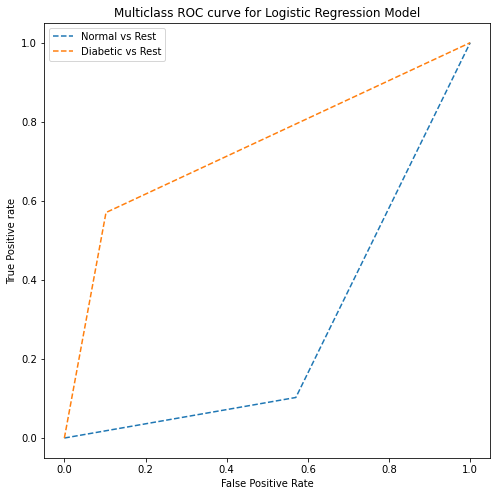


============================== Logistic Regression Model Evaluation ==============================

Cross Validation Mean Score:
 0.7833599893375982

Model Accuracy:
 0.7858306188925082

Model Precision:
 0.7662537462537462

Model Recall:
 0.7694805194805194

Model F1 Score:
 0.76536177057642

Confusion matrix:
 [[726  83]
 [180 239]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.80      0.90      0.85       809
    Diabetic       0.74      0.57      0.65       419

    accuracy                           0.79      1228
   macro avg       0.77      0.73      0.75      1228
weighted avg       0.78      0.79      0.78      1228



ROC AUC Score:
 0.7339049653215172


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


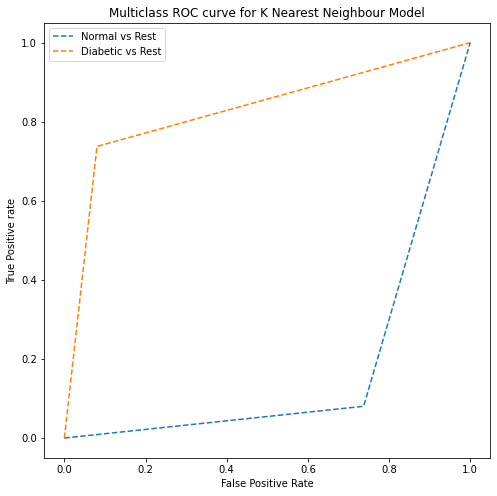


============================== K Nearest Neighbour Model Evaluation ==============================

Cross Validation Mean Score:
 0.7971877915500467

Model Accuracy:
 0.8574918566775245

Model Precision:
 0.8204945054945055

Model Recall:
 0.8214285714285714

Model F1 Score:
 0.8182379912915931

Confusion matrix:
 [[744  65]
 [110 309]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.87      0.92      0.89       809
    Diabetic       0.83      0.74      0.78       419

    accuracy                           0.86      1228
   macro avg       0.85      0.83      0.84      1228
weighted avg       0.86      0.86      0.86      1228



ROC AUC Score:
 0.8285620303801801


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


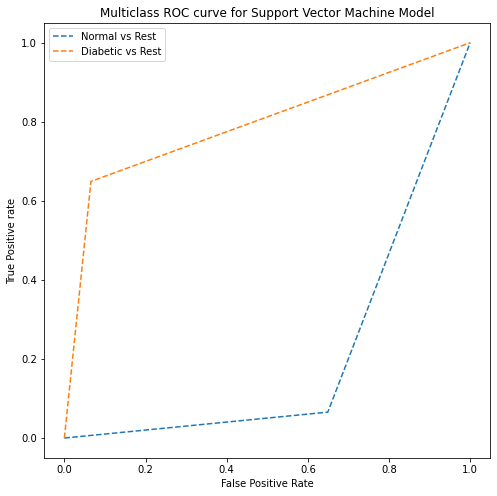


============================== Support Vector Machine Model Evaluation ==============================

Cross Validation Mean Score:
 0.7996001599360255

Model Accuracy:
 0.8371335504885994

Model Precision:
 0.8236864059076715

Model Recall:
 0.8246753246753247

Model F1 Score:
 0.8217655057127651

Confusion matrix:
 [[756  53]
 [147 272]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.84      0.93      0.88       809
    Diabetic       0.84      0.65      0.73       419

    accuracy                           0.84      1228
   macro avg       0.84      0.79      0.81      1228
weighted avg       0.84      0.84      0.83      1228



ROC AUC Score:
 0.7918258494089465


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


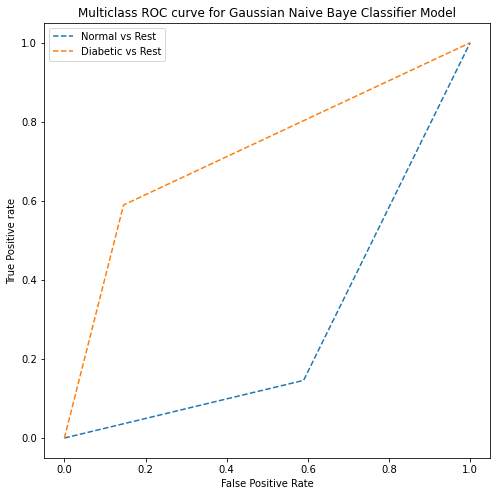


============================== Gaussian Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.7572770891643342

Model Accuracy:
 0.7638436482084691

Model Precision:
 0.7498176700147143

Model Recall:
 0.7532467532467533

Model F1 Score:
 0.7503354102338873

Confusion matrix:
 [[691 118]
 [172 247]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.80      0.85      0.83       809
    Diabetic       0.68      0.59      0.63       419

    accuracy                           0.76      1228
   macro avg       0.74      0.72      0.73      1228
weighted avg       0.76      0.76      0.76      1228



ROC AUC Score:
 0.7218198606960476


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


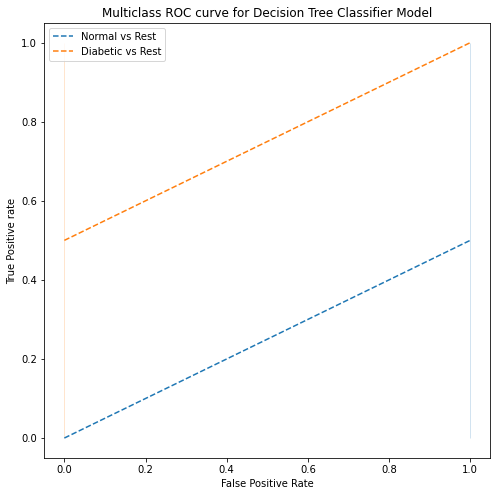


============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9039051046248169

Model Accuracy:
 1.0

Model Precision:
 0.9700889661519583

Model Recall:
 0.9675324675324676

Model F1 Score:
 0.9677613942553127

Confusion matrix:
 [[809   0]
 [  0 419]]

Classification report:
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       809
    Diabetic       1.00      1.00      1.00       419

    accuracy                           1.00      1228
   macro avg       1.00      1.00      1.00      1228
weighted avg       1.00      1.00      1.00      1228



ROC AUC Score:
 1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


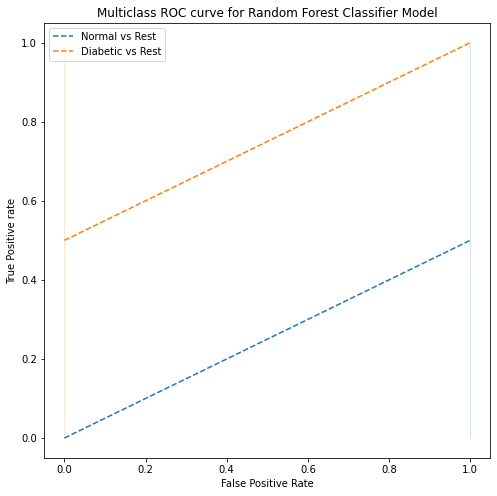


============================== Random Forest Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9161135545781688

Model Accuracy:
 1.0

Model Precision:
 0.9557080361958411

Model Recall:
 0.9545454545454546

Model F1 Score:
 0.9547509671179883

Confusion matrix:
 [[809   0]
 [  0 419]]

Classification report:
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       809
    Diabetic       1.00      1.00      1.00       419

    accuracy                           1.00      1228
   macro avg       1.00      1.00      1.00      1228
weighted avg       1.00      1.00      1.00      1228



ROC AUC Score:
 1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


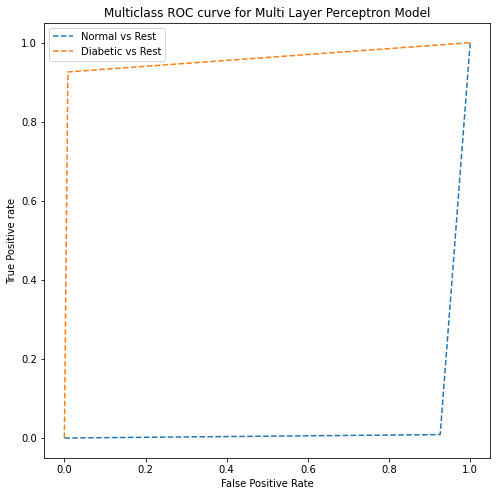


============================== Multi Layer Perceptron Model Evaluation ==============================

Cross Validation Mean Score:
 0.8712981474077035

Model Accuracy:
 0.9690553745928339

Model Precision:
 0.8632525110357623

Model Recall:
 0.8636363636363636

Model F1 Score:
 0.8620274635503062

Confusion matrix:
 [[802   7]
 [ 31 388]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.96      0.99      0.98       809
    Diabetic       0.98      0.93      0.95       419

    accuracy                           0.97      1228
   macro avg       0.97      0.96      0.97      1228
weighted avg       0.97      0.97      0.97      1228



ROC AUC Score:
 0.9586808311035457


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


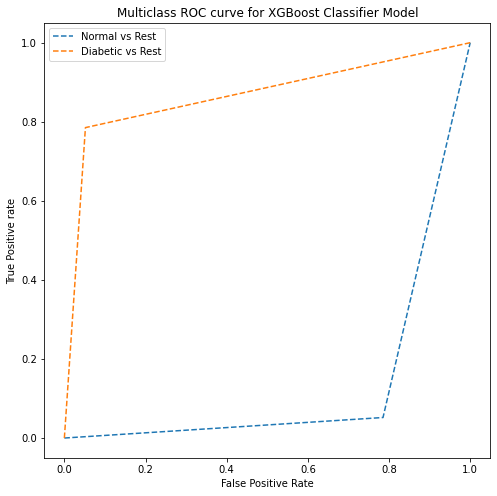


============================== XGBoost Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.8273157403705185

Model Accuracy:
 0.8925081433224755

Model Precision:
 0.829842049518413

Model Recall:
 0.8311688311688312

Model F1 Score:
 0.8299122706202352

Confusion matrix:
 [[767  42]
 [ 90 329]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.89      0.95      0.92       809
    Diabetic       0.89      0.79      0.83       419

    accuracy                           0.89      1228
   macro avg       0.89      0.87      0.88      1228
weighted avg       0.89      0.89      0.89      1228



ROC AUC Score:
 0.8666434591749737


In [ ]:
from sklearn import metrics
import time
import matplotlib.pyplot as plt
import seaborn as sns

models = []
models.append(('Logistic Regression', LGR_Classifier))
models.append(('K Nearest Neighbour',KNN_Classifier))
models.append(('Support Vector Machine',SVM_Classifier))
models.append(('Gaussian Naive Baye Classifier', GNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('Random Forest Classifier', classifier))
models.append(('Multi Layer Perceptron', MLP_Classifier))
models.append(('XGBoost Classifier', XGB_Classifier))


for i, v in models:
    scores = cross_val_score(v, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(X_train))
    precision = metrics.precision_score(y_train, v.predict(X_train), average='weighted')
    recall = metrics.recall_score(y_train, v.predict(X_train), average='weighted')
    f1score = metrics.f1_score(y_train, v.predict(X_train), average='weighted')
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train))
    classification = metrics.classification_report(y_train, v.predict(X_train), target_names=['Normal', 'Diabetic'])
    predictions_proba = v.predict_proba(X_train)
    #print(predictions_proba.shape)
    #print(y_train.shape)
    #predictions_proba=predictions_proba[:,0]
    #print(predictions_proba.shape)
    rocaucscore=metrics.roc_auc_score(y_train.reshape(-1,1),v.predict(X_train),average='macro',multi_class="ovr")
    fpr = {}
    tpr = {}
    thresh ={}
    for j in range(2):    
        fpr[j], tpr[j], thresh[j] = metrics.roc_curve(y_train, v.predict(X_train), pos_label=j)
    fig, ax = plt.subplots(figsize=(8,8))
    label = ['Normal', 'Diabetic']
    for j in range(2):
        sns.lineplot(fpr[j], tpr[j], linestyle='--', label=f'{label[j]} vs Rest', ax=ax)
    plt.title('Multiclass ROC curve for {} Model'.format(i))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.show()
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print ("Model Precision:" "\n", precision)
    print()
    print ("Model Recall:" "\n", recall)
    print()
    print ("Model F1 Score:" "\n", f1score)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()
    print()  
    print("ROC AUC Score:" "\n", rocaucscore) 


============================== Logistic Regression Model Evaluation ==============================



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


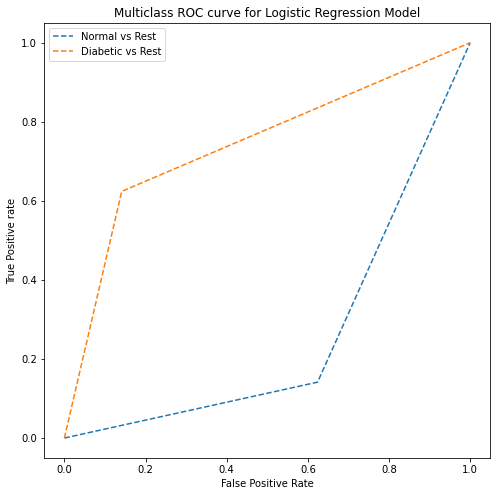

Cross Validation Mean Score:
 0.7764516129032258

Model Accuracy:
 0.7694805194805194

Model Precision:
 0.7662537462537462

Model Recall:
 0.7694805194805194

Model F1 Score:
 0.76536177057642

Confusion matrix:
 [[164  27]
 [ 44  73]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.79      0.86      0.82       191
    Diabetic       0.73      0.62      0.67       117

    accuracy                           0.77       308
   macro avg       0.76      0.74      0.75       308
weighted avg       0.77      0.77      0.77       308



ROC AUC Score:
 0.7412851836935607


TPR:
 [0.85863874 0.62393162]


FPR:
 [0.37606838 0.14136126]


TNR:
 [0.62393162 0.85863874]


FNR:
 [0.14136126 0.37606838]

============================== K Nearest Neighbour Model Evaluation ==============================



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


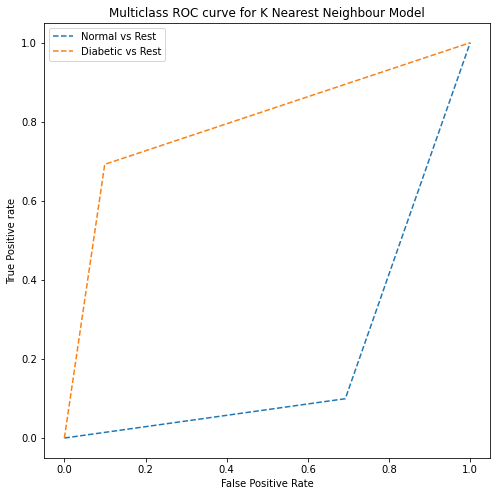

Cross Validation Mean Score:
 0.7335483870967742

Model Accuracy:
 0.8214285714285714

Model Precision:
 0.8204945054945055

Model Recall:
 0.8214285714285714

Model F1 Score:
 0.8182379912915931

Confusion matrix:
 [[172  19]
 [ 36  81]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.83      0.90      0.86       191
    Diabetic       0.81      0.69      0.75       117

    accuracy                           0.82       308
   macro avg       0.82      0.80      0.80       308
weighted avg       0.82      0.82      0.82       308



ROC AUC Score:
 0.7964156262585582


TPR:
 [0.90052356 0.69230769]


FPR:
 [0.30769231 0.09947644]


TNR:
 [0.69230769 0.90052356]


FNR:
 [0.09947644 0.30769231]

============================== Support Vector Machine Model Evaluation ==============================



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


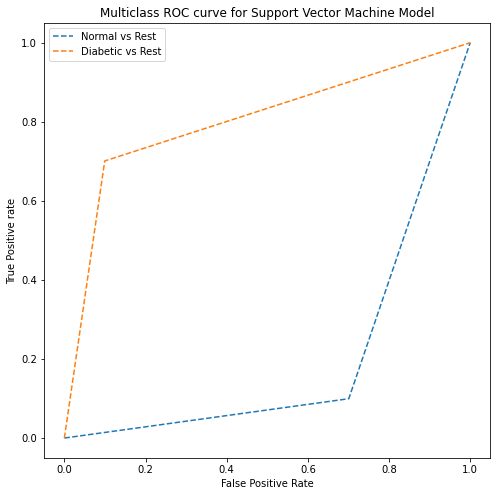

Cross Validation Mean Score:
 0.7631182795698924

Model Accuracy:
 0.8246753246753247

Model Precision:
 0.8236864059076715

Model Recall:
 0.8246753246753247

Model F1 Score:
 0.8217655057127651

Confusion matrix:
 [[172  19]
 [ 35  82]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.83      0.90      0.86       191
    Diabetic       0.81      0.70      0.75       117

    accuracy                           0.82       308
   macro avg       0.82      0.80      0.81       308
weighted avg       0.82      0.82      0.82       308



ROC AUC Score:
 0.8006891305320625


TPR:
 [0.90052356 0.7008547 ]


FPR:
 [0.2991453  0.09947644]


TNR:
 [0.7008547  0.90052356]


FNR:
 [0.09947644 0.2991453 ]

============================== Gaussian Naive Baye Classifier Model Evaluation ==============================



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


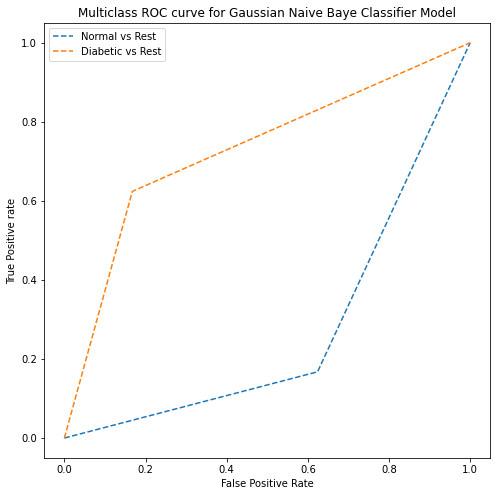

Cross Validation Mean Score:
 0.7473118279569892

Model Accuracy:
 0.7532467532467533

Model Precision:
 0.7498176700147143

Model Recall:
 0.7532467532467533

Model F1 Score:
 0.7503354102338873

Confusion matrix:
 [[159  32]
 [ 44  73]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.78      0.83      0.81       191
    Diabetic       0.70      0.62      0.66       117

    accuracy                           0.75       308
   macro avg       0.74      0.73      0.73       308
weighted avg       0.75      0.75      0.75       308



ROC AUC Score:
 0.7281961784579586


TPR:
 [0.83246073 0.62393162]


FPR:
 [0.37606838 0.16753927]


TNR:
 [0.62393162 0.83246073]


FNR:
 [0.16753927 0.37606838]

============================== Decision Tree Classifier Model Evaluation ==============================



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


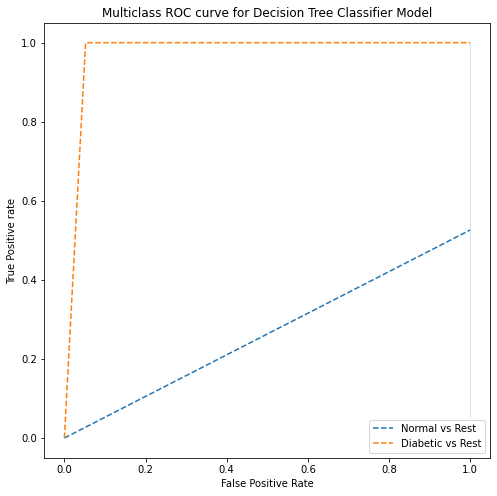

Cross Validation Mean Score:
 0.6982795698924732

Model Accuracy:
 0.9675324675324676

Model Precision:
 0.9700889661519583

Model Recall:
 0.9675324675324676

Model F1 Score:
 0.9677613942553127

Confusion matrix:
 [[181  10]
 [  0 117]]

Classification report:
               precision    recall  f1-score   support

      Normal       1.00      0.95      0.97       191
    Diabetic       0.92      1.00      0.96       117

    accuracy                           0.97       308
   macro avg       0.96      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



ROC AUC Score:
 0.9738219895287958


TPR:
 [0.94764398 1.        ]


FPR:
 [0.         0.05235602]


TNR:
 [1.         0.94764398]


FNR:
 [0.05235602 0.        ]

============================== Random Forest Classifier Model Evaluation ==============================



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


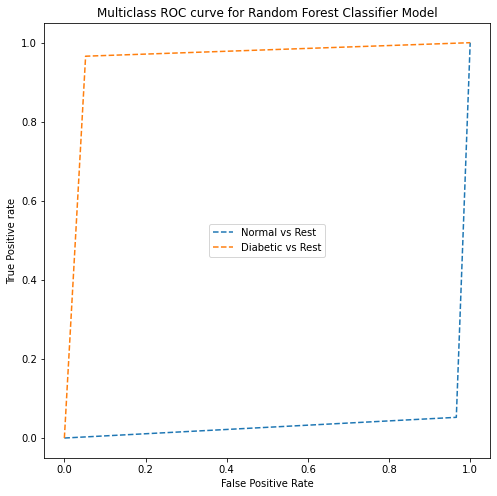

Cross Validation Mean Score:
 0.7764516129032258

Model Accuracy:
 0.9545454545454546

Model Precision:
 0.9557080361958411

Model Recall:
 0.9545454545454546

Model F1 Score:
 0.9547509671179883

Confusion matrix:
 [[181  10]
 [  4 113]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.98      0.95      0.96       191
    Diabetic       0.92      0.97      0.94       117

    accuracy                           0.95       308
   macro avg       0.95      0.96      0.95       308
weighted avg       0.96      0.95      0.95       308



ROC AUC Score:
 0.9567279724347788


TPR:
 [0.94764398 0.96581197]


FPR:
 [0.03418803 0.05235602]


TNR:
 [0.96581197 0.94764398]


FNR:
 [0.05235602 0.03418803]

============================== Multi Layer Perceptron Model Evaluation ==============================



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


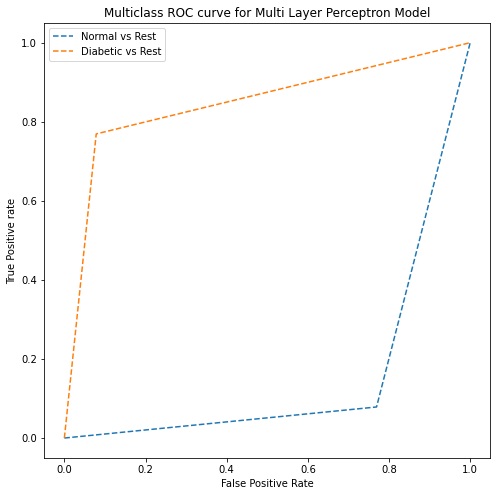

Cross Validation Mean Score:
 0.7306451612903226

Model Accuracy:
 0.8636363636363636

Model Precision:
 0.8632525110357623

Model Recall:
 0.8636363636363636

Model F1 Score:
 0.8620274635503062

Confusion matrix:
 [[176  15]
 [ 27  90]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.87      0.92      0.89       191
    Diabetic       0.86      0.77      0.81       117

    accuracy                           0.86       308
   macro avg       0.86      0.85      0.85       308
weighted avg       0.86      0.86      0.86       308



ROC AUC Score:
 0.8453483689085782


TPR:
 [0.92146597 0.76923077]


FPR:
 [0.23076923 0.07853403]


TNR:
 [0.76923077 0.92146597]


FNR:
 [0.07853403 0.23076923]

============================== XGBoost Classifier Model Evaluation ==============================



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


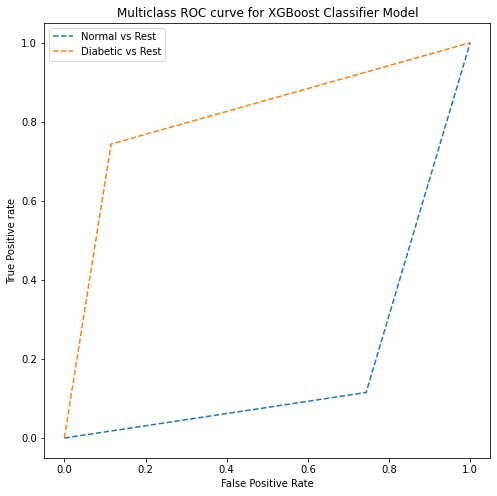

Cross Validation Mean Score:
 0.7375268817204301

Model Accuracy:
 0.8311688311688312

Model Precision:
 0.829842049518413

Model Recall:
 0.8311688311688312

Model F1 Score:
 0.8299122706202352

Confusion matrix:
 [[169  22]
 [ 30  87]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.85      0.88      0.87       191
    Diabetic       0.80      0.74      0.77       117

    accuracy                           0.83       308
   macro avg       0.82      0.81      0.82       308
weighted avg       0.83      0.83      0.83       308



ROC AUC Score:
 0.8142032487582226


TPR:
 [0.88481675 0.74358974]


FPR:
 [0.25641026 0.11518325]


TNR:
 [0.74358974 0.88481675]


FNR:
 [0.11518325 0.25641026]


In [ ]:
from sklearn import metrics
import time
import matplotlib.pyplot as plt
import seaborn as sns

models = []
models.append(('Logistic Regression', LGR_Classifier))
models.append(('K Nearest Neighbour',KNN_Classifier))
models.append(('Support Vector Machine',SVM_Classifier))
models.append(('Gaussian Naive Baye Classifier', GNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('Random Forest Classifier', classifier))
models.append(('Multi Layer Perceptron', MLP_Classifier))
models.append(('XGBoost Classifier', XGB_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_test, y_test, cv=10)
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    precision = metrics.precision_score(y_test, v.predict(X_test), average='weighted')
    recall = metrics.recall_score(y_test, v.predict(X_test), average='weighted')
    f1score = metrics.f1_score(y_test, v.predict(X_test), average='weighted')
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    classification = metrics.classification_report(y_test, v.predict(X_test), target_names=['Normal', 'Diabetic'])
    predictions_proba = v.predict_proba(X_test)
    FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix) 
    FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
    TP = np.diag(confusion_matrix)
    TN = confusion_matrix.sum() - (FP + FN + TP)
    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    FPR = 1 - TNR
    FNR = 1 - TPR 
    #print(predictions_proba.shape)
    #print(y_train.shape)
    #predictions_proba=predictions_proba[:,0]
    #print(predictions_proba.shape)
    rocaucscore=metrics.roc_auc_score(y_test.reshape(-1,1),v.predict(X_test),average='macro',multi_class="ovr")
    fpr = {}
    tpr = {}
    thresh ={}
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    for j in range(2):    
        fpr[j], tpr[j], thresh[j] = metrics.roc_curve(y_test, v.predict(X_test), pos_label=j)
    fig, ax = plt.subplots(figsize=(8,8))
    label = ['Normal', 'Diabetic']
    for j in range(2):
        sns.lineplot(fpr[j], tpr[j], linestyle='--', label=f'{label[j]} vs Rest', ax=ax)
    plt.title('Multiclass ROC curve for {} Model'.format(i))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.show()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print ("Model Precision:" "\n", precision)
    print()
    print ("Model Recall:" "\n", recall)
    print()
    print ("Model F1 Score:" "\n", f1score)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()
    print()  
    print("ROC AUC Score:" "\n", rocaucscore) 
    print()
    print()
    print("TPR:" "\n", TPR)
    print()
    print()
    print("FPR:" "\n", FPR)
    print()
    print()
    print("TNR:" "\n", TNR)
    print()
    print()
    print("FNR:" "\n", FNR)

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
kmean = KMeans(n_clusters=2)
kmean.fit(X_train)
train_labels = kmean.labels_

In [ ]:
train_labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
y_train

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
train_lables = []
for i in train_labels:
  if i == 0:
    train_lables.append(1)
  else:
    train_lables.append(0)

In [ ]:
print('Training Accuracy:',metrics.accuracy_score(y_train, train_lables))
print('Training Precision:',metrics.precision_score(y_train, train_lables))
print('Training Recall:',metrics.recall_score(y_train, train_lables))
print('Training F1 Score:',metrics.f1_score(y_train, train_lables))
print(metrics.classification_report(y_train, train_lables))
print(metrics.confusion_matrix(y_train, train_lables))
print(metrics.roc_auc_score(y_train.reshape(-1,1),train_lables,average='macro',multi_class="ovr"))

Training Accuracy: 0.6677524429967426
Training Precision: 0.5128805620608899
Training Recall: 0.522673031026253
Training F1 Score: 0.5177304964539007
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       809
           1       0.51      0.52      0.52       419

    accuracy                           0.67      1228
   macro avg       0.63      0.63      0.63      1228
weighted avg       0.67      0.67      0.67      1228

[[601 208]
 [200 219]]
0.6327827454265998


In [ ]:
test_labels = kmean.predict(X_test)
test_lables = []
for i in test_labels:
  if i == 0:
    test_lables.append(1)
  else:
    test_lables.append(0)

In [ ]:
print('Testing Accuracy:',metrics.accuracy_score(y_test, test_lables))
print('Testing Precision:',metrics.precision_score(y_test, test_lables))
print('Testing Recall:',metrics.recall_score(y_test, test_lables))
print('Testing F1 Score:',metrics.f1_score(y_test, test_lables))
print(metrics.classification_report(y_test, test_lables))
print(metrics.confusion_matrix(y_test, test_lables))
print(metrics.roc_auc_score(y_test.reshape(-1,1),test_lables,average='macro',multi_class="ovr"))

Testing Accuracy: 0.7012987012987013
Testing Precision: 0.6033057851239669
Testing Recall: 0.6239316239316239
Testing F1 Score: 0.6134453781512605
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       191
           1       0.60      0.62      0.61       117

    accuracy                           0.70       308
   macro avg       0.68      0.69      0.69       308
weighted avg       0.70      0.70      0.70       308

[[143  48]
 [ 44  73]]
0.6863113617040318


In [18]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics

In [22]:
agg = AgglomerativeClustering(n_clusters = 2, compute_distances=True)
agg.fit(X)
train_labels = agg.labels_

In [23]:
print('Accuracy:',metrics.accuracy_score(Y, train_labels))
print('Precision:',metrics.precision_score(Y, train_labels))
print('Recall:',metrics.recall_score(Y, train_labels))
print('F1 Score:',metrics.f1_score(Y, train_labels))
print(metrics.classification_report(Y, train_labels))
print(metrics.confusion_matrix(Y, train_labels))
print(metrics.roc_auc_score(Y.reshape(-1,1),train_labels,average='macro',multi_class="ovr"))

Accuracy: 0.6614583333333334
Precision: 0.5116959064327485
Recall: 0.6529850746268657
F1 Score: 0.5737704918032788
              precision    recall  f1-score   support

           0       0.78      0.67      0.72      1000
           1       0.51      0.65      0.57       536

    accuracy                           0.66      1536
   macro avg       0.65      0.66      0.65      1536
weighted avg       0.69      0.66      0.67      1536

[[666 334]
 [186 350]]
0.6594925373134328


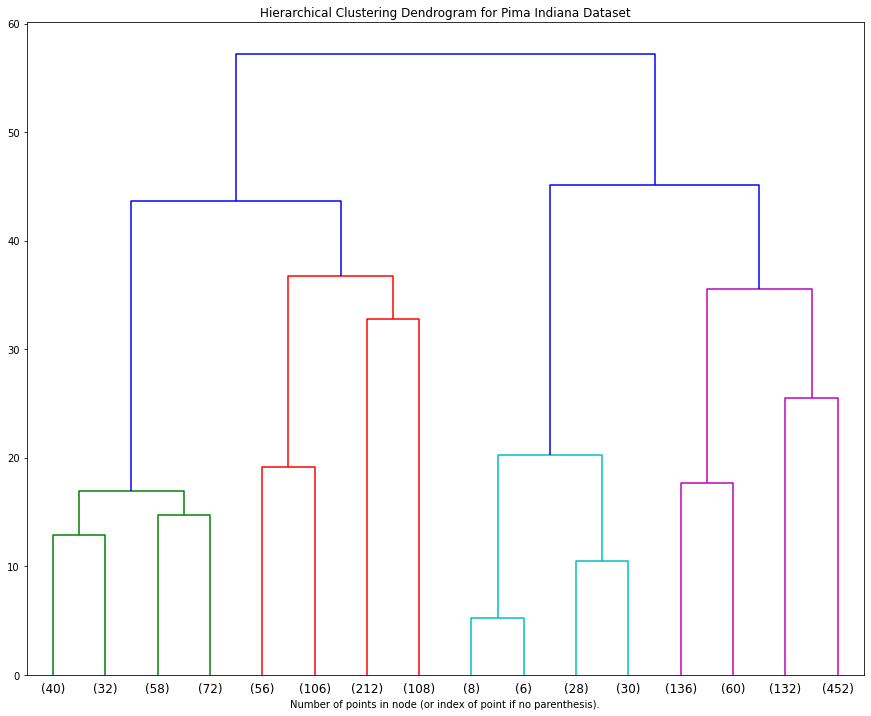

In [25]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
fig = plt.figure(figsize = (15,12))
plt.title("Hierarchical Clustering Dendrogram for Pima Indiana Dataset")
# plot the top three levels of the dendrogram
plot_dendrogram(agg, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()